# Group 16 - Project 1

Tiara Allard, Jackson Glass, Connor Rose, Kayla Sprincis

Format: This notebook provides an overview of cleaning, EDA, and visualization. We summarize the steps taken in the code. Interpretation of these results, as well as more in depth overview of why we made the decisions we made are in the associated paper, 'DS3001 Project1 Group16.pdf'

# Data Cleaning

### Method

1. Import GSS data from the .sas file
2. Use pandas to subset our columns of interest
3. Clean each of the columns based on information from the GSS 2022 Codebook

### Note on the 2022 Data

- The columns 'DISRSPCT' and 'NOTSMART' were not found in the 2022 GSS data
- Many variables (FAIR, TRUST, HELPFUL) have multiple columns that ask the same question, but that was collected with a differnet data collection method. We only kept data collected with the updated method, and combined columns which asked the same question

### Works Cited for Data Cleaning

1. https://www.marsja.se/how-to-read-sas-files-in-python-with-pandas/
2. https://sparkbyexamples.com/pandas/pandas-replace-nan-values-by-zero-in-a-column/#:~:text=Use%20the%20DataFrame.,but%20returns%20a%20new%20DataFrame.

#### Importing the data and subsetting useful columns

We read in the data in to a pandas dataframe. Since it is of type .sas7bdat, a special function is used. We subset the columns we want for analysis and exame the head of the dataframe and its shape (3544, 17)

In [1]:
import pandas as pd
import numpy as np

cols_used = ['HAPPY', 'LIFE', 'HAPMAR', 'HAPCOHAB', 'FAIRNV', 'FAIRV', 'TRUSTV', 'TRUSTNV', 'HELPFULV', 'HELPFULNV','AGE','CONINC','PARTYID', 'SOCOMMUN', 'SOCFREND' ,'SOCBAR', 'SOCREL']
df = pd.read_sas('gss2022.sas7bdat')

df = df[cols_used]


print(df.shape, '\n')
print(df.head())

(3544, 17) 

   HAPPY  LIFE  HAPMAR  HAPCOHAB  FAIRNV  FAIRV  TRUSTV  TRUSTNV  HELPFULV  \
0    3.0   2.0     NaN       NaN     1.0    NaN     NaN      2.0       NaN   
1    3.0   2.0     2.0       NaN     NaN    NaN     NaN      NaN       NaN   
2    3.0   2.0     NaN       NaN     NaN    3.0     2.0      NaN       1.0   
3    3.0   2.0     NaN       NaN     NaN    NaN     NaN      NaN       NaN   
4    2.0   2.0     NaN       2.0     NaN    1.0     2.0      NaN       2.0   

   HELPFULNV   AGE   CONINC  PARTYID  SOCOMMUN  SOCFREND  SOCBAR  SOCREL  
0        1.0  72.0  67200.0      0.0       NaN       NaN     NaN     NaN  
1        NaN  80.0      NaN      3.0       6.0       5.0     5.0     5.0  
2        NaN  57.0  30240.0      5.0       NaN       NaN     NaN     NaN  
3        NaN  23.0  67200.0      0.0       3.0       3.0     3.0     3.0  
4        NaN  62.0  18480.0      3.0       NaN       NaN     NaN     NaN  


#### Cleaning of Individual Variables

For each variable, we check its datatype, the number of NaNs, and the different values in the variable. If further cleaning is necessary to work with the data, such as applying labels, it is done. We also write the codebook interpretation of the question, and what each numeric response means

#### Cleaning of HAPPY

Taken all together, how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy? Type: Numeric Scale: 1 (very happy), 2 (pretty happy), 3 (not too happy)

In [2]:
print(df['HAPPY'].dtypes, '\n')
print(df['HAPPY'].value_counts(), '\n')
print(df['HAPPY'].isna().sum())

float64 

2.0    1942
3.0     799
1.0     779
Name: HAPPY, dtype: int64 

24


#### Cleaning of LIFE

In general, do you find life exciting, pretty routine, or dull? Type: Numeric Scale: 1 (exciting), 2 (Routine), 3 (Dull)

In [3]:
print(df['LIFE'].dtypes, '\n')
print(df['LIFE'].value_counts(), '\n')
print(df['LIFE'].isna().sum())

float64 

2.0    1225
1.0     993
3.0     114
Name: LIFE, dtype: int64 

1212


#### Cleaning of HAPMAR and HAPCOHAB

(IF CURRENTLY MARRIED, ASK HAPMAR) Taking things all together, how would you describe your marriage? Would you say that your marriage is very happy, pretty happy, or not too happy? and HAPCOHAB - (IF CURRENTLY UNMARRIED OR ANSWERED PUNCHES 1 OR 2 FOR POSSLQ OR POSSLQY, ASK HAPCOHAB) Taking things all together, would you say that your relationship with your partner is very happy, pretty happy, or not too happy?

The two variables measure happiness of romantic relationships. The difference is that
HAPMAR involves those that are officially married, so a person would not have answered 
both questions The two varibles are combined into one varible to reflect happiness of 
those living with romantic partner - This new variable is HAPPARTNER

Scale:  1 (very happy), 2 (pretty happy), 3 (not too happy)

In [4]:
print(df['HAPMAR'].dtypes, '\n')
print(df['HAPMAR'].value_counts(), '\n')
print(df['HAPMAR'].isna().sum())

print(df['HAPCOHAB'].dtypes, '\n')
print(df['HAPCOHAB'].value_counts(), '\n')
print(df['HAPCOHAB'].isna().sum())

df['HAPMAR'] = df['HAPMAR'].fillna(0)
df['HAPCOHAB'] = df['HAPCOHAB'].fillna(0)
df['HAPPARTNER'] = df['HAPMAR'] + df['HAPCOHAB']
df['HAPPARTNER'] = df['HAPPARTNER'].replace(0, np.nan)

df = df.drop(columns = ['HAPMAR', 'HAPCOHAB'])
df.head()

float64 

1.0    881
2.0    502
3.0     72
Name: HAPMAR, dtype: int64 

2089
float64 

1.0    190
2.0    113
3.0     10
Name: HAPCOHAB, dtype: int64 

3231


,HAPPY,LIFE,FAIRNV,FAIRV,TRUSTV,TRUSTNV,HELPFULV,HELPFULNV,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER
0,3.0,2.0,1.0,NaN,NaN,2.0,NaN,1.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN
1,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,3.0,6.0,5.0,5.0,5.0,2.0
2,3.0,2.0,NaN,3.0,2.0,NaN,1.0,NaN,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN
3,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,67200.0,0.0,3.0,3.0,3.0,3.0,NaN
4,2.0,2.0,NaN,1.0,2.0,NaN,2.0,NaN,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0


#### Cleaning of FAIRV/FAIRNV

The -V/-NV suffix appears on data which was collected using a more updated method, and we combined these two columns in  to a single column. Since each is an independent interview, there is no overlap, so no data is lost. We can then safely remove the -V/-NV columns. 

FAIR asks: Do you think most people would try to take advantage of you if they got a chance, or would they try to be fair? Type: Numeric Scale 1 (take advantage), 2 (fair), 3 (depends)

In [5]:
print(df['FAIRNV'].dtypes, '\n')
print(df['FAIRNV'].value_counts(), '\n')
print(df['FAIRNV'].isna().sum())

print(df['FAIRV'].dtypes, '\n')
print(df['FAIRV'].value_counts(), '\n')
print(df['FAIRV'].isna().sum())

df['FAIRNV'] = df['FAIRNV'].fillna(0)
df['FAIRV'] = df['FAIRV'].fillna(0)
df['FAIR_C'] = df['FAIRNV'] + df['FAIRV']
df['FAIR_C'] = df['FAIR_C'].replace(0, np.nan)

df = df.drop(columns = ['FAIRNV', 'FAIRV'])
df.head()

float64 

1.0    318
2.0    256
3.0      2
Name: FAIRNV, dtype: int64 

2968
float64 

3.0    262
1.0    156
2.0    148
Name: FAIRV, dtype: int64 

2978


,HAPPY,LIFE,TRUSTV,TRUSTNV,HELPFULV,HELPFULNV,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C
0,3.0,2.0,NaN,2.0,NaN,1.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,3.0,2.0,NaN,NaN,NaN,NaN,80.0,NaN,3.0,6.0,5.0,5.0,5.0,2.0,NaN
2,3.0,2.0,2.0,NaN,1.0,NaN,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0
3,3.0,2.0,NaN,NaN,NaN,NaN,23.0,67200.0,0.0,3.0,3.0,3.0,3.0,NaN,NaN
4,2.0,2.0,2.0,NaN,2.0,NaN,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0


#### Cleaning of TRUSTV/TRUSTNV

TRUST was cleaned similarly to how FAIR was, with the -V/-NV suffix columns combined.

Trust asks: Generally speaking, would you say that most people can be trusted or that you can't be too careful in dealing with people? Type: Numeric Combined since the two vars rep different data collection methods, not different questions

In [6]:
print(df['TRUSTNV'].dtypes, '\n')
print(df['TRUSTNV'].value_counts(), '\n')
print(df['TRUSTNV'].isna().sum())

print(df['TRUSTV'].dtypes, '\n')
print(df['TRUSTV'].value_counts(), '\n')
print(df['TRUSTV'].isna().sum())

df['TRUSTNV'] = df['TRUSTNV'].fillna(0)
df['TRUSTV'] = df['TRUSTV'].fillna(0)
df['TRUST_C'] = df['TRUSTNV'] + df['TRUSTV']
df['TRUST_C'] = df['TRUST_C'].replace(0, np.nan)

df = df.drop(columns = ['TRUSTNV', 'TRUSTV'])
df.head()

float64 

2.0    383
1.0    195
3.0      1
Name: TRUSTNV, dtype: int64 

2965
float64 

2.0    257
3.0    214
1.0     98
Name: TRUSTV, dtype: int64 

2975


,HAPPY,LIFE,HELPFULV,HELPFULNV,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C,TRUST_C
0,3.0,2.0,NaN,1.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1,3.0,2.0,NaN,NaN,80.0,NaN,3.0,6.0,5.0,5.0,5.0,2.0,NaN,NaN
2,3.0,2.0,1.0,NaN,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0
3,3.0,2.0,NaN,NaN,23.0,67200.0,0.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
4,2.0,2.0,2.0,NaN,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0


#### Cleaning of HELPFULV/HELPFULNV

HELPFUL was cleaned similarly to how FAIR was, with the -V/-NV suffix columns combined.

Helpful asks: Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves? Type: Numeric scale: 1 (helpful), 2 (selfish), 3 (depends) Combined since the two vars rep different data collection methods, not different questions

In [7]:

print(df['HELPFULNV'].dtypes, '\n')
print(df['HELPFULNV'].value_counts(), '\n')
print(df['HELPFULNV'].isna().sum())

print(df['HELPFULV'].dtypes, '\n')
print(df['HELPFULV'].value_counts(), '\n')
print(df['HELPFULV'].isna().sum())

df['HELPFULNV'] = df['HELPFULNV'].fillna(0)
df['HELPFULV'] = df['HELPFULV'].fillna(0)
df['HELPFUL_C'] = df['HELPFULNV'] + df['HELPFULV']
df['HELPFUL_C'] = df['HELPFUL_C'].replace(0, np.nan)

df = df.drop(columns = ['HELPFULNV', 'HELPFULV'])
df.head()

float64 

1.0    303
2.0    275
Name: HELPFULNV, dtype: int64 

2966
float64 

3.0    272
2.0    153
1.0    144
Name: HELPFULV, dtype: int64 

2975


,HAPPY,LIFE,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C,TRUST_C,HELPFUL_C
0,3.0,2.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
1,3.0,2.0,80.0,NaN,3.0,6.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN
2,3.0,2.0,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0
3,3.0,2.0,23.0,67200.0,0.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN
4,2.0,2.0,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0


#### Cleaning of AGE

Age of participant, Type: numeric

In [8]:
print(df['AGE'].dtypes, '\n')
print(df['AGE'].value_counts(), '\n')
print(df['AGE'].isna().sum())

float64 

32.0    76
60.0    75
39.0    72
36.0    69
33.0    69
        ..
83.0    13
86.0    11
85.0     8
87.0     5
88.0     4
Name: AGE, Length: 72, dtype: int64 

208


#### Cleaning of CONINC

Inflation-adjusted family income. Type: numeric

The variable has several categories for income, we map the listed values in CONINC to specific categories. The variable CONINC provides a middle value for each range, and CONINC_CAT provides the income category of the participant

In [9]:
print(df['CONINC'].dtypes, '\n')
print(df['CONINC'].value_counts(), '\n')
print(df['CONINC'].isna().sum())

map_c = {336.0: '$1-999', 1344.0: '$1,000-1,999 ', 2352.0:'$2,000-2,999', 3024.0: '$3,000-3,999', 3696.0: '$3,000-3,999', 4368.0: '$4,000-4,999', 5040.0: '$5,000-5,999', 6048.0: '$6,000-6,999', 7560.0: '$7,000-7,999', 9240.0: '$9,000-9,999', 10920.0: '$10,000-10,999', 12600.0: '$12,000-14,999', 14280.0: '$12,000-14,999', 15960.0: '$15,000-19,999', 18480.0:'$15,000-19,999',  21840.0: '$20,000-24,999', 25200.0: '$25,000-29,999', 30240.0: '$30,000-39,999', 36960.0: '$30,000-39,999',45360.0: '$40,000-49,999', 55440.0: "$50,000-74,999", 67200.0:"$50,000-74,999", 80640.0: '$75,000-99,999', 94080.0: '$75,000-99,999', 107520.0: '$100,000-999,999', 168736.0: '$100,000-999,999'}
    
df["CONINC"] = df["CONINC"].round(0)
df['CONINC_CAT'] = df["CONINC"].replace(map_c)
df.head()

float64 

168736.29696    330
45360.00000     304
67200.00000     249
55440.00000     240
36960.00000     239
30240.00000     211
80640.00000     169
21840.00000     162
25200.00000     152
94080.00000     147
18480.00000     129
7560.00000      104
15960.00000     100
107520.00000     97
14280.00000      92
9240.00000       83
10920.00000      64
12600.00000      51
6048.00000       40
336.00000        39
1344.00000       33
2352.00000       18
3696.00000       16
5040.00000       16
4368.00000       14
3024.00000       11
Name: CONINC, dtype: int64 

434


,HAPPY,LIFE,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C,TRUST_C,HELPFUL_C,CONINC_CAT
0,3.0,2.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,"$50,000-74,999"
1,3.0,2.0,80.0,NaN,3.0,6.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN
2,3.0,2.0,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,"$30,000-39,999"
3,3.0,2.0,23.0,67200.0,0.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,"$50,000-74,999"
4,2.0,2.0,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,"$15,000-19,999"


#### Cleaning of PARTYID

Political party the respondent identifies (and how strongly) Type: Numeric

The varible PARTYID_CAT reps the catagory the varible is in PARTYID provides the code according to the code book. We map numeric values to their associated categories in the new PARTYID_CAT column

In [10]:
print(df['PARTYID'].dtypes, '\n')
print(df['PARTYID'].value_counts(), '\n')
print(df['PARTYID'].isna().sum())

map_p = {0: 'STRONG DEMOCRAT', 1: 'NOT VERY STRONG DEMOCRAT', 2: 'INDEPENDENT, CLOSE TO DEMOCRAT', 3: 'INDEPENDENT (NEITHER, NO RESPONSE)', 4: 'INDEPENDENT, CLOSE TO REPUBLICAN', 5: 'NOT VERY STRONG REPUBLICAN', 6: 'STRONG REPUBLICAN', 7: 'OTHER PARTY '}
df['PARTYID_CAT'] = df["PARTYID"].replace(map_p)

df.head()

float64 

3.0    835
0.0    595
1.0    451
6.0    431
2.0    400
5.0    361
4.0    330
7.0    106
Name: PARTYID, dtype: int64 

35


,HAPPY,LIFE,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C,TRUST_C,HELPFUL_C,CONINC_CAT,PARTYID_CAT
0,3.0,2.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,"$50,000-74,999",STRONG DEMOCRAT
1,3.0,2.0,80.0,NaN,3.0,6.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,"INDEPENDENT (NEITHER, NO RESPONSE)"
2,3.0,2.0,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,"$30,000-39,999",NOT VERY STRONG REPUBLICAN
3,3.0,2.0,23.0,67200.0,0.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,"$50,000-74,999",STRONG DEMOCRAT
4,2.0,2.0,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,"$15,000-19,999","INDEPENDENT (NEITHER, NO RESPONSE)"


#### Cleaning of SOC*

Cleaning for social variables Type: Numeric SOCBAR - Go to a bar or tavern? SOCFREND - Spend a social evening with friends who live outside the neighborhood? SOCOMMUN - How often do you spend a social evening with someone who lives in your neighborhood? SOCREL - How often do you spend a social evening with relatives?

Follows a scale of 1 (most often) to 7 (least often)

In [11]:
print(df['SOCBAR'].dtypes, '\n')
print(df['SOCBAR'].value_counts(), '\n')
print(df['SOCBAR'].isna().sum())

print(df['SOCFREND'].dtypes, '\n')
print(df['SOCFREND'].value_counts(), '\n')
print(df['SOCFREND'].isna().sum())

print(df['SOCOMMUN'].dtypes, '\n')
print(df['SOCOMMUN'].value_counts(), '\n')
print(df['SOCOMMUN'].isna().sum())

print(df['SOCREL'].dtypes, '\n')
print(df['SOCREL'].value_counts(), '\n')
print(df['SOCREL'].isna().sum())

float64 

7.0    1014
5.0     406
6.0     361
4.0     272
3.0     199
2.0     105
1.0      11
Name: SOCBAR, dtype: int64 

1176
float64 

4.0    494
5.0    488
3.0    447
2.0    343
7.0    305
6.0    221
1.0     68
Name: SOCFREND, dtype: int64 

1178
float64 

7.0    864
2.0    320
5.0    312
4.0    303
3.0    264
6.0    226
1.0     83
Name: SOCOMMUN, dtype: int64 

1172
float64 

2.0    486
5.0    462
3.0    433
4.0    377
1.0    282
6.0    173
7.0    157
Name: SOCREL, dtype: int64 

1174


#### Dropping of unecessary rows

We drop several rows from the dataframe to make our data consistent and easier to work with.

Since HAPPY is a crucial variable, we drop all rows which have a NaN value for HAPPY

Rows without data for the FAIR_C or TRUST_C columns are also dropped, as they used the old system of data collection. For the sake of consistent data, we are only considering the set of data with the modern collection methods

In [12]:
df = df.dropna(subset=['HAPPY', 'FAIR_C'])

df.to_csv('cleaned_data.csv')

# Exploratory Data Analysis

For our exploratory data analysis, we aimed to understand the variables better by looking at their individual distributions, as well as how they correlated with other variables in the dataset. This gives us a good understanding of the data which we can use to create compelling visualizations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

df = pd.read_csv('./cleaned_data.csv')

df.head()

,Unnamed: 0,HAPPY,LIFE,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C,TRUST_C,HELPFUL_C,CONINC_CAT,PARTYID_CAT
0,0,3.0,2.0,72.0,67200.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,"$50,000-74,999",STRONG DEMOCRAT
1,2,3.0,2.0,57.0,30240.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,"$30,000-39,999",NOT VERY STRONG REPUBLICAN
2,4,2.0,2.0,62.0,18480.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,"$15,000-19,999","INDEPENDENT (NEITHER, NO RESPONSE)"
3,5,2.0,1.0,27.0,36960.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,"$30,000-39,999",NOT VERY STRONG DEMOCRAT
4,7,2.0,2.0,47.0,168736.0,0.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,3.0,"$100,000-999,999",STRONG DEMOCRAT


#### Examining measures of central tendency of the dataset

We use the .describe() function to examine interesting measures of central tendency in the dataset. It should be noted that much of the data is effectively categorical, but examining the mean and count can tell us roughly about how variables are distributed. 

In [14]:
df.describe()

,Unnamed: 0,HAPPY,LIFE,AGE,CONINC,PARTYID,SOCOMMUN,SOCFREND,SOCBAR,SOCREL,HAPPARTNER,FAIR_C,TRUST_C,HELPFUL_C
count,1136.000000,1136.000000,574.000000,1082.000000,998.000000,1130.000000,560.000000,557.000000,559.000000,560.00000,619.000000,1136.000000,1134.000000,1134.000000
mean,1773.461268,2.055458,1.695122,48.447320,59475.454910,2.918584,5.167857,4.324955,5.443649,3.72500,1.436187,1.816021,1.932981,1.848325
std,1005.084892,0.690723,0.550498,17.623714,49796.386255,2.050840,1.805488,1.506690,1.521633,1.63134,0.599662,0.783389,0.664911,0.778071
min,0.000000,1.000000,1.000000,18.000000,336.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,851.500000,2.000000,1.000000,33.000000,21840.000000,1.000000,4.000000,3.000000,5.000000,2.00000,1.000000,1.000000,1.000000,1.000000
50%,1804.500000,2.000000,2.000000,47.000000,45360.000000,3.000000,5.000000,4.000000,6.000000,4.00000,1.000000,2.000000,2.000000,2.000000
75%,2626.500000,3.000000,2.000000,63.000000,80640.000000,4.000000,7.000000,5.000000,7.000000,5.00000,2.000000,2.000000,2.000000,2.000000
max,3538.000000,3.000000,3.000000,89.000000,168736.000000,7.000000,7.000000,7.000000,7.000000,7.00000,3.000000,3.000000,3.000000,3.000000


#### Distributions

We create a histogram overlayed with a kernel density plot for each of the numeric variables in the dataset. These histograms allow us to see how responses are distributed - such as the distribution of HAPPY. We can then use these distriubtions to determine interesting features of the dataset

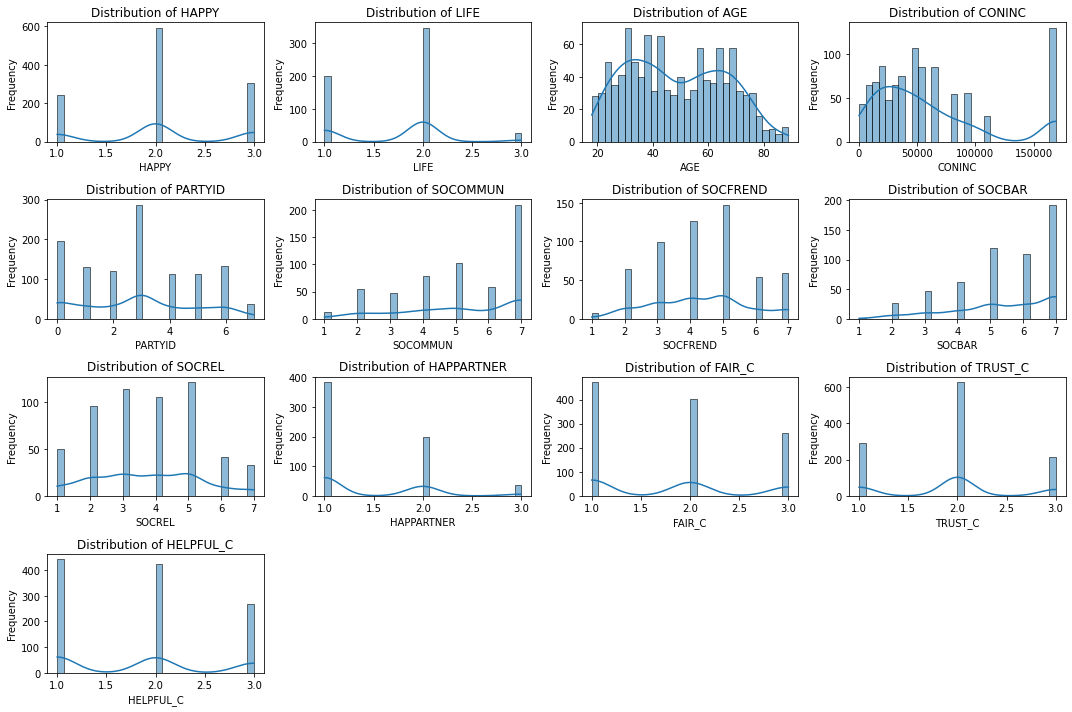

In [15]:
variables = ['HAPPY', 'LIFE', 'AGE', 'CONINC', 'PARTYID']
variables = df.columns.tolist()[1:-2]

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Further examining Distributions of HAPPY, AGE, and CONINC

Of the distributions above, we decided to look further in to those of HAPPY, AGE, and CONINC. For happy, we care about the relative percent of happy, unhappy, and moderately happy responses are, which can be seen in the distribution. For AGE and CONINC, the distributions are more spread out, and allow us to get a better understanding of the participants involved in the dataset

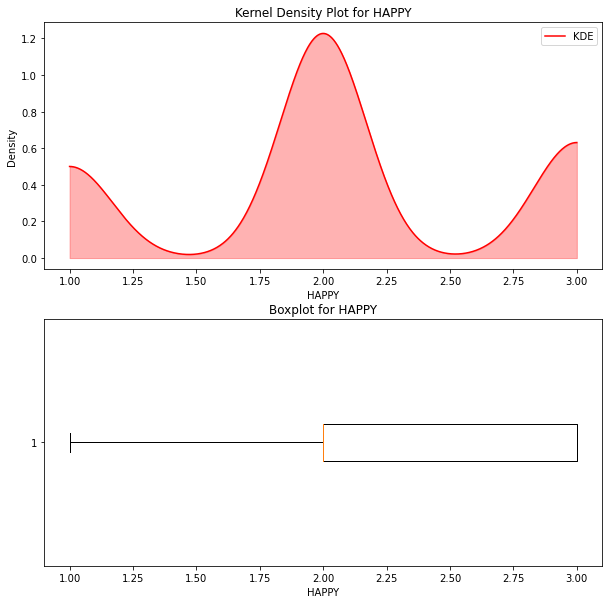

In [16]:
# HAPPY kdp and boxplot
# setting up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# kernel density plot
density = gaussian_kde(df['HAPPY'].dropna())
x_vals = np.linspace(min(df['HAPPY'].dropna()), max(df['HAPPY'].dropna()), 1000)
y_vals = density(x_vals)
ax[0].plot(x_vals, y_vals, color='red', label='KDE')
ax[0].fill_between(x_vals, y_vals, color='red', alpha=0.3)
ax[0].set_title('Kernel Density Plot for HAPPY')
ax[0].set_xlabel('HAPPY')
ax[0].set_ylabel('Density')
ax[0].legend()

# boxplot
ax[1].boxplot(df['HAPPY'].dropna(), vert=False)
ax[1].set_title('Boxplot for HAPPY')
ax[1].set_xlabel('HAPPY')

plt.show()

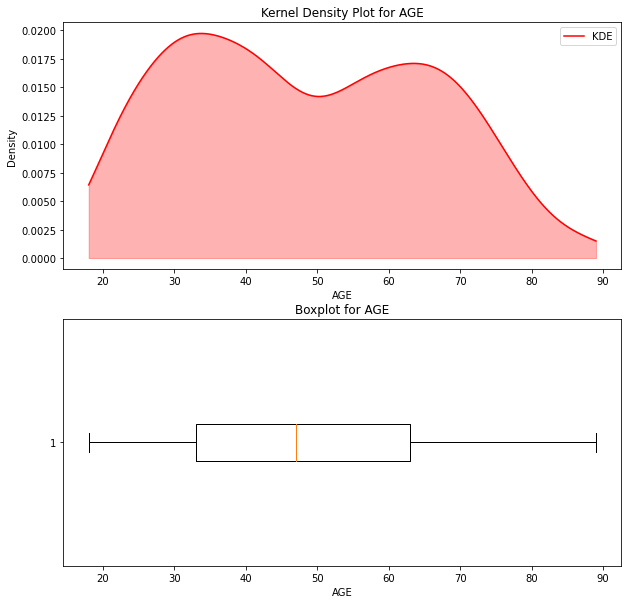

In [17]:
# AGE kdp and boxplot
# setting up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# kernel density plot
density = gaussian_kde(df['AGE'].dropna())
x_vals = np.linspace(min(df['AGE'].dropna()), max(df['AGE'].dropna()), 1000)
y_vals = density(x_vals)
ax[0].plot(x_vals, y_vals, color='red', label='KDE')
ax[0].fill_between(x_vals, y_vals, color='red', alpha=0.3)
ax[0].set_title('Kernel Density Plot for AGE')
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('Density')
ax[0].legend()

# boxplot
ax[1].boxplot(df['AGE'].dropna(), vert=False)
ax[1].set_title('Boxplot for AGE')
ax[1].set_xlabel('AGE')

plt.show()

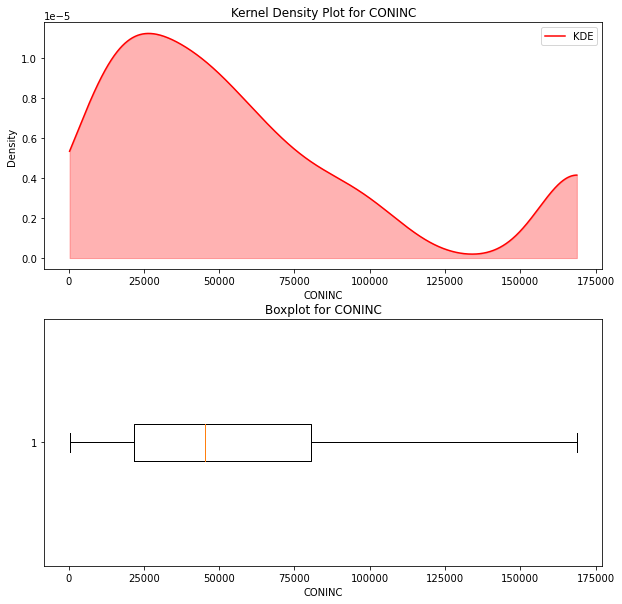

In [18]:
# CONINC kdp and boxplot
# setting up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# kernel density plot
density = gaussian_kde(df['CONINC'].dropna())
x_vals = np.linspace(min(df['CONINC'].dropna()), max(df['CONINC'].dropna()), 1000)
y_vals = density(x_vals)
ax[0].plot(x_vals, y_vals, color='red', label='KDE')
ax[0].fill_between(x_vals, y_vals, color='red', alpha=0.3)
ax[0].set_title('Kernel Density Plot for CONINC')
ax[0].set_xlabel('CONINC')
ax[0].set_ylabel('Density')
ax[0].legend()

# boxplot
ax[1].boxplot(df['CONINC'].dropna(), vert=False)
ax[1].set_title('Boxplot for CONINC')
ax[1].set_xlabel('CONINC')

plt.show()

#### Correlation Matrix

We believed that a correlation matrix would be beneficial to our analysis. Though many of the variables are numeric versions of categorical variables, many follow a scale, which allows us to see broad trends from the correlation matrix. This matrix allowed us to identify key relationships, such as HAPPY and LIFE, which we later use in visualization

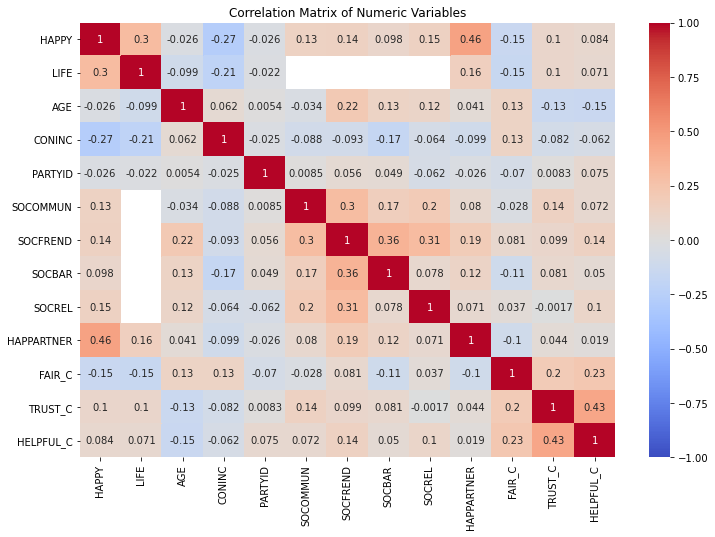

In [19]:
# drop non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns
numeric_data = df.drop(columns=non_numeric_columns)
numeric_data = numeric_data.iloc[:,1:]

# compute the correlation matrix
correlation_matrix = numeric_data.corr()

# generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Variables")

plt.show()

#### Cross Tabulations

Based on correlation matrix data, and the fact that they all formed a convenient 3x3 table, we looked at cross tabulations of HAPPY with FAIR, TRUST, and HELPFUL. These variables don't have a clear linear scale, so it is useful to look at their specific cross tabulations, keeping in mine what each number in the variables represents (as described in our data cleaning section)

In [20]:
cross_tab_happy_fair = pd.crosstab(df['HAPPY'], df['FAIR_C'])

cross_tab_happy_fair

FAIR_C,1.0,2.0,3.0
HAPPY,,,
1.0,73,108,60
2.0,222,229,140
3.0,177,64,63


In [21]:
cross_tab_happy_trust = pd.crosstab(df['HAPPY'], df['TRUST_C'])

cross_tab_happy_trust

TRUST_C,1.0,2.0,3.0
HAPPY,,,
1.0,88,105,48
2.0,161,311,117
3.0,42,212,50


In [22]:
cross_tab_happy_help = pd.crosstab(df['HAPPY'], df['HELPFUL_C'])

cross_tab_happy_help

HELPFUL_C,1.0,2.0,3.0
HAPPY,,,
1.0,109,76,56
2.0,248,202,140
3.0,85,144,74


# Data Visualization

We explore 4 main visualizations. Two bar charts of happiness versus age, and versus income, as well as two heatmaps of happiness versus happiness with partner, and versus outlook on life

In [23]:
df = pd.read_csv('./cleaned_data.csv')

We create bins and data labels for creating clear visualizations

In [24]:
# Create bins for age data

bins = [0,30,40,50,60,70,np.inf]
names = ['18-30','30-40','40-50','50-60','60-70','70+']
df['AGERANGE'] = pd.cut(df['AGE'],bins,labels=names)

# Defining Later Labels

happy = ['Very Happy','Pretty Happy','Not Happy']
happy2 = ['Not Happy','Pretty Happy','Very Happy']
colors = ['limegreen','cornflowerblue','crimson']
life = ['Dull','Routine','Exciting']

#### Bar Chart of Age versus Happiness

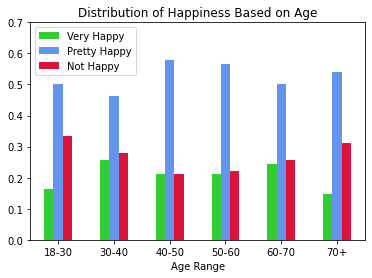

In [25]:
# Cross-tabulate and plot age ranges with happiness

happyage = pd.crosstab(df['AGERANGE'],df['HAPPY'],normalize='index')
ax3 = happyage.plot.bar(rot=0,xlabel='Age Range',ylim=(0,0.7),title='Distribution of Happiness Based on Age',color=colors)
ax3.legend(labels=happy)
plt.savefig('Happiness_Age.pdf')

#### Bar Chart of Inflation Adjusted Income versus Age

We bin data by income ranges and create our bar chart

In [26]:
# Create bins for income data

cbins = [0,25000,50000,75000,100000,np.inf]
cnames = ['<25k','25k-50k','50k-75k','75k-100k','>100k']
df['INCRANGE'] = pd.cut(df['CONINC'],cbins,labels=cnames)

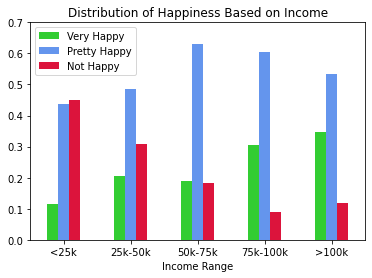

In [27]:
# Cross-tabulate and graph income ranges with happiness

happyinc = pd.crosstab(df['INCRANGE'],df['HAPPY'],normalize='index')
ax4 = happyinc.plot.bar(rot=0,xlabel='Income Range',ylim=(0,0.7),title='Distribution of Happiness Based on Income',color=colors)
ax4.legend(labels=happy)
plt.savefig('Happiness_Income.pdf')

#### Heatmap of Happiness and Excitement in Life

We crosstabulate HAPPY and LIFE and convert it in to a heatmap

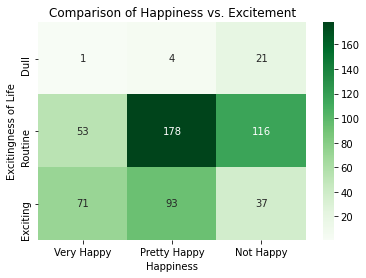

In [28]:
# Cross-tabulate and reverse (for graphical sense) happiness and excitement data

happylife = pd.crosstab(df['LIFE'],df['HAPPY'])
hlreverse = happylife.iloc[::-1]

# Graph happiness and excitement data

ax = sns.heatmap(hlreverse, annot=True,cmap='Greens',fmt='g',xticklabels=happy,yticklabels=life)
ax.set(xlabel='Happiness',ylabel='Excitingness of Life',title='Comparison of Happiness vs. Excitement')
plt.show
plt.savefig('Happiness_Life.pdf')

#### Heatmap of Happiness and Happiness with Partner

We crosstabulate HAPPY and HAPPARTNER and convert it in to a heatmap

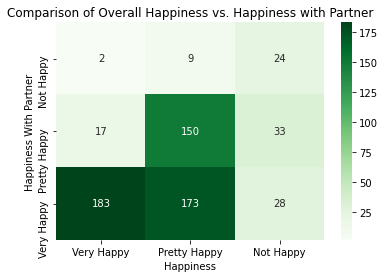

In [29]:
# Cross-tabulate and reverse (for graphical sense) happiness data, for both overall and specifically with partner

happypartner = pd.crosstab(df['HAPPARTNER'],df['HAPPY'])
happypartner
hpreverse = happypartner.iloc[::-1]

# Graph data for happiness, both overall and specifically with partner
ax2 = sns.heatmap(hpreverse, annot=True,cmap='Greens',fmt='g',xticklabels=happy,yticklabels=happy2)
ax2.set(xlabel='Happiness',ylabel='Happiness With Partner',title='Comparison of Overall Happiness vs. Happiness with Partner')
plt.show
plt.savefig('Happiness_Partner.pdf')

# Conclusions

Conclusions from our EDA and visualization are all noted in our group's paper. We provide an overview of which variables are closely connected to happiness, and the implications of those connections.